In [2]:
import time

# work with directories
import os 
from pathlib import Path 

# datetime
import datetime as dt

# work with data
import numpy as np
import pandas as pd
# import pandas_datareader.data as web # not needed for this code

# visualize data
import matplotlib.pyplot as plt

# create bag of word vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# gensim
import pyLDAvis.gensim_models
from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import gensim._matutils
import multiprocessing
import IPython


### 1. Load data

Here we load the data for each company from the 'Consumer Staples' sector. The files were generated in `1_Data_Preprocessing.ipynb`

In [3]:
chd_df = pd.read_csv("data/CHD.csv")
print(chd_df.shape)
chd_df.head(5)

(70, 7)


,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus
0,FIELD OF THE INVENTION\n\nThe present inventio...,7665418,CHD,395,2/23/2010,Consumer Staples,field invent present invent relat absorb compo...
1,FIELD OF THE INVENTION\n\nThe present inventio...,7723629,CHD,395,5/25/2010,Consumer Staples,field invent present invent relat field toothb...
2,RELATED APPLICATIONS AND PATENTS\n\nThe presen...,7763454,CHD,395,7/27/2010,Consumer Staples,relat applic patent present invent relat u.s. ...
3,FIELD OF THE INVENTION\n\nThe present inventio...,7772578,CHD,395,8/10/2010,Consumer Staples,field invent present invent relat diagnost tes...
4,FIELD OF THE INVENTION\n\nThe invention relate...,7776618,CHD,395,8/17/2010,Consumer Staples,field invent invent relat diagnost assay analy...


In [4]:
cl_df = pd.read_csv("data/CL.csv")
print(cl_df.shape)
cl_df.head(5)

(335, 7)


,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus
0,This invention is directed to a dispensing con...,7690531,CL,3401,4/6/2010,Consumer Staples,invent direct dispens contain enhanc appear pa...
1,BACKGROUND OF THE INVENTION\n\nHard surface cl...,7700536,CL,3401,4/20/2010,Consumer Staples,background invent hard surfac cleaner usual wa...
2,FIELD OF THE INVENTION\n\nThe present inventio...,7703163,CL,3401,4/27/2010,Consumer Staples,field invent present invent relat toothbrush m...
3,BACKGROUND OF THE INVENTION\n\nThe efficacy of...,7704531,CL,3401,4/27/2010,Consumer Staples,background invent efficaci antiperspir salt in...
4,BACKGROUND OF THE INVENTION\n\nThe present inv...,7707677,CL,3401,5/4/2010,Consumer Staples,background invent present invent direct manual...


In [5]:
cpb_df = pd.read_csv("data/CPB.csv")
print(cpb_df.shape)
cpb_df.head(5)

(4, 7)


,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus
0,FIELD OF THE INVENTION\n\nThe present inventio...,8463423,CPB,137,6/11/2013,Consumer Staples,field invent present invent relat general syst...
1,FIELD OF THE INVENTION\n\nThe present inventio...,9066627,CPB,137,6/30/2015,Consumer Staples,field invent present invent relat instant food...
2,BACKGROUND OF THE INVENTION\n\n1. Field of Inv...,9193510,CPB,137,11/24/2015,Consumer Staples,background invent 1. field invent invent relat...
3,FIELD OF THE INVENTION\n\nThe present inventio...,9873603,CPB,137,1/23/2018,Consumer Staples,field invent present invent relat apparatus fi...


In [6]:
hsy_df = pd.read_csv("data/HSY.csv")
print(hsy_df.shape)
hsy_df.head(5)

(18, 7)


,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus
0,FIELD OF THE INVENTION AND INTRODUCTION\n\nThe...,7641930,HSY,27,1/5/2010,Consumer Staples,field invent introduct invent relat novel meth...
1,FIELD OF THE INVENTION\n\nThis invention gener...,7721908,HSY,27,5/25/2010,Consumer Staples,field invent invent general relat hand-held co...
2,FIELD OF THE INVENTION\n\nThis invention relat...,7829127,HSY,27,11/9/2010,Consumer Staples,field invent invent relat general calcium fort...
3,FIELD OF THE INVENTION AND INTRODUCTION\n\nThe...,7919135,HSY,27,4/5/2011,Consumer Staples,field invent introduct invent relat new bevera...
4,FIELD OF THE INVENTION\n\nThe invention relate...,8088431,HSY,27,1/3/2012,Consumer Staples,field invent invent relat food product ingredi...


### 2. Corpus data

Here we create the dataframes including only the patent_id and clean_corpus for each company.

In [7]:
# Helper functions

def sort_by_date(df):
    df['issue_date'] = pd.to_datetime(df['issue_date'])
    df = df.sort_values('issue_date').reset_index(drop=True)
    return df

def create_corpus(input_df):
    '''
    This functions creates the cropus and remove rows with no patent data information
    
    '''
    df = input_df.set_index('patent_id')['clean_corpus']
    df.dropna(axis=0, inplace=True)
    return df

In [8]:
chd_df = sort_by_date(chd_df)
chd_corpus = create_corpus(chd_df)
chd_corpus[:5]

patent_id
7665418    field invent present invent relat absorb compo...
7723629    field invent present invent relat field toothb...
7763454    relat applic patent present invent relat u.s. ...
7772578    field invent present invent relat diagnost tes...
7776618    field invent invent relat diagnost assay analy...
Name: clean_corpus, dtype: object

In [9]:
cl_df = sort_by_date(cl_df)
cl_corpus = create_corpus(cl_df)
cl_corpus[:5]

patent_id
7690531    invent direct dispens contain enhanc appear pa...
7700536    background invent hard surfac cleaner usual wa...
7703163    field invent present invent relat toothbrush m...
7704531    background invent efficaci antiperspir salt in...
7707677    background invent present invent direct manual...
Name: clean_corpus, dtype: object

In [10]:
cpb_df = sort_by_date(cpb_df)
cpb_corpus = create_corpus(cpb_df)
cpb_corpus[:5]

patent_id
8463423    field invent present invent relat general syst...
9066627    field invent present invent relat instant food...
9193510    background invent 1. field invent invent relat...
9873603    field invent present invent relat apparatus fi...
Name: clean_corpus, dtype: object

In [11]:
hsy_df = sort_by_date(hsy_df)
hsy_corpus = create_corpus(hsy_df)
hsy_corpus[:5]

patent_id
7641930    field invent introduct invent relat novel meth...
7721908    field invent invent general relat hand-held co...
7829127    field invent invent relat general calcium fort...
7919135    field invent introduct invent relat new bevera...
8088431    field invent invent relat food product ingredi...
Name: clean_corpus, dtype: object

### 3. LDA models

In [14]:
# Helper functions

def tfidf_corpus(corpus):
    '''
    This function preprocesses a given corpus creating a dictionary, generating a Bag-of-Words representation, and
    applying TF-IDF transformation.
    
    '''
    gensim_corpus = [doc.split() for doc in corpus.to_list()]
    dictionary = Dictionary(gensim_corpus)
    ldacorpus = [dictionary.doc2bow(doc) for doc in gensim_corpus]
    tfidfmodel = TfidfModel(ldacorpus)
    tfidfmodel_corpus = tfidfmodel[ldacorpus]
    return gensim_corpus, dictionary, ldacorpus, tfidfmodel, tfidfmodel_corpus

def lda_model(corpus,num_topics):

    tfidf_corpus_outputs = tfidf_corpus(corpus)
    
    lda_gensim = LdaMulticore(tfidf_corpus_outputs[4], 
                          id2word=tfidf_corpus_outputs[1],
                          num_topics=num_topics,
                          workers=min(4, multiprocessing.cpu_count()-1), # number of cores
                          passes=10, # training passes
                          chunksize=200, # no. of documents in each training chuck
                         )
    return lda_gensim


#### 3.1. Optimal number of topics

To obtain the optimal number of topics for each company, we use the coherence score. Firstly, we train LDA models with different numbers of topics (5-20) for each company and compute the coherence values for each LDA model. Then, we identify the number of topics where the coherence value is highest or plateaus and define this number of topics as the optimal one.

In [79]:
def optimal_topics(corpus):
    # initialize list to save coherence values and lda model
    coherence_values = []
    lda_models = []

    tfidf_corpus_outputs = tfidf_corpus(corpus)

    # for each value of n
    for n in range(5, 21):

        # train the lda model with n topics
        model = LdaMulticore(tfidf_corpus_outputs[4], 
                            id2word=tfidf_corpus_outputs[1],
                            num_topics=n,
                            workers=min(8, multiprocessing.cpu_count()-1), # number of cores
                            passes=10, # training passes
                            chunksize=200, # no. of documents in each training chuck
                            )
        # add the model to the corresponding initialized list
        lda_models.append(model)
        
        # create coherence model with the above trained lda model
        coherencemodel = CoherenceModel(model=model, texts=tfidf_corpus_outputs[0], dictionary=tfidf_corpus_outputs[1], 
                                        coherence='c_v')
        
        # add the value for n and the coherence to the corresponding initialized list
        coherence_val = coherencemodel.get_coherence()
        print(n, coherence_val)
        coherence_values.append( (n, coherence_val) )
    plt.style.use('ggplot')
    plt.plot(*zip(*coherence_values))
    plt.title('Coherence Values for LDA models with Different Number of Topics\n')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence')
    plt.show()

5 0.485006302240238
6 0.4553955984665228
7 0.4741611724054395
8 0.4596810154653541
9 0.4653530972574474
10 0.43600625805385346
11 0.4579339776521774
12 0.4789659180860298
13 0.4437791787212234
14 0.4738348759797173
15 0.42806219890282166
16 0.503725311361779
17 0.4694928617769354
18 0.46902810433237785
19 0.40716777711601326
20 0.3836247253360192


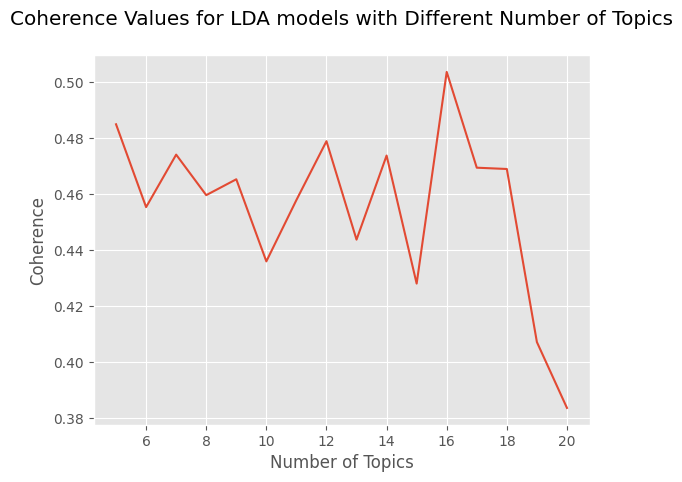

In [84]:
# CHD optimal number of topics

optimal_topics(chd_corpus)

5 0.3936834675778883
6 0.47710623129755936
7 0.48216456039179967
8 0.5107517769167129
9 0.5285537146968559
10 0.5095841459308701
11 0.5254383638004474
12 0.4856820194106614
13 0.47932422598230534
14 0.5022818673363184
15 0.5131901107692481
16 0.49744374179431033
17 0.4472186574568232
18 0.4916577973198253
19 0.48744582932343217
20 0.495206438381176


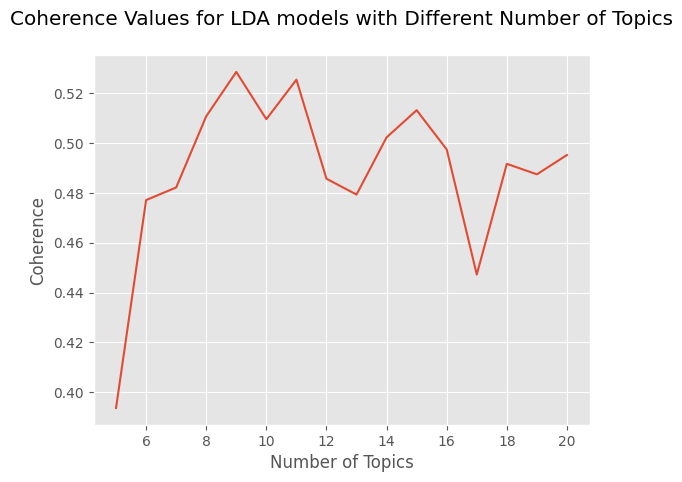

In [81]:
# CL optimal number of topics

optimal_topics(cl_corpus)

5 0.34329358638178487
6 0.3655685458566962
7 0.47081203146833284
8 0.48847711062154703
9 0.45200233392325245
10 0.4450459455373547
11 0.3403591113668281
12 0.4411014048711173
13 0.3458181847377565
14 0.2989587137888324
15 0.33815264924099003
16 0.3561616983932753
17 0.3540046435627518
18 0.3273632843360954
19 0.3537324287184389
20 0.33444013025041214


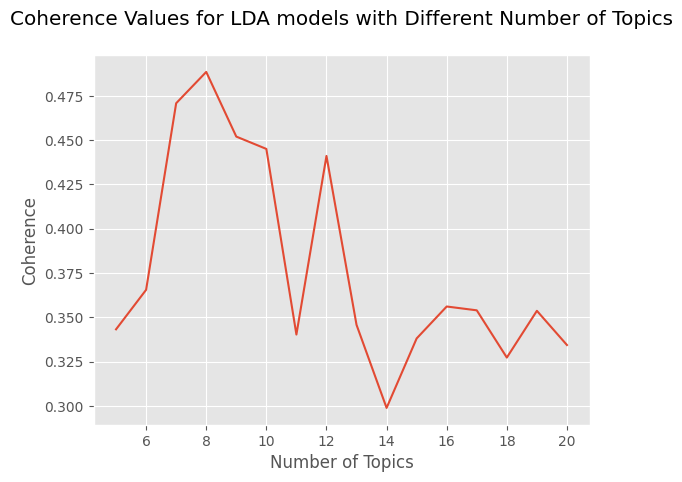

In [82]:
# CPB optimal number of topics

optimal_topics(cpb_corpus)

5 0.5944230672652
6 0.39960495614769725
7 0.46076272995045237
8 0.4457633425173243
9 0.4677771625579142
10 0.46850391137370984
11 0.48547068969559376
12 0.650068610785306
13 0.5080543159934142
14 0.4222879501647494
15 0.4782490193562236
16 0.5548336582894297
17 0.5092363652447839
18 0.4877162523891471
19 0.5719606108117703
20 0.465563483076588


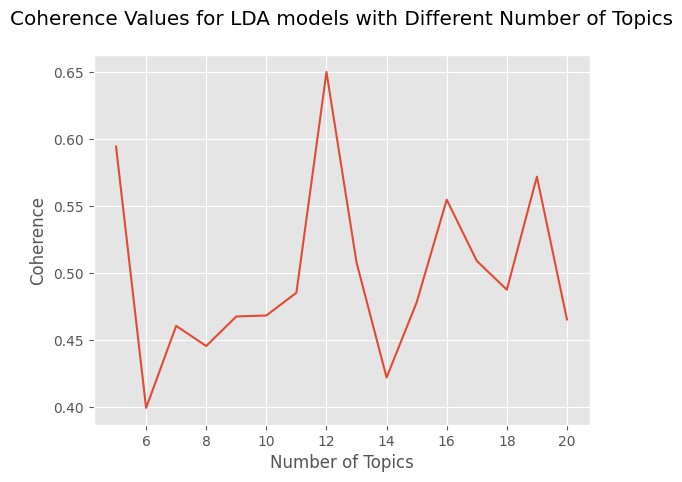

In [83]:
# HSY optimal number of topics

optimal_topics(hsy_corpus)

#### 3.2. LDA model by company

#### 3.2.a. CHD

In [15]:
# Model

chd_lda = lda_model(chd_corpus,16)

In [16]:
# Visualization

chd_tfidf_corpus = tfidf_corpus(chd_corpus)

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(chd_lda, chd_tfidf_corpus[2], chd_tfidf_corpus[1])

pyLDAvis.save_html(LDAvis_prepared, 'LDAvis_tfidf_chd' + str(16) +'.html')


In [17]:
IPython.display.HTML(filename= 'LDAvis_tfidf_chd' + str(16) +'.html')

#### 3.2.b. CL

In [18]:
# Model

cl_lda = lda_model(cl_corpus,9)

In [19]:
# Visualization

cl_tfidf_corpus = tfidf_corpus(cl_corpus)

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(cl_lda, cl_tfidf_corpus[2], cl_tfidf_corpus[1])

pyLDAvis.save_html(LDAvis_prepared, 'LDAvis_tfidf_cl' + str(9) +'.html')


In [20]:
IPython.display.HTML(filename= 'LDAvis_tfidf_cl' + str(9) +'.html')

#### 3.2.c. CPB

In [21]:
# Model

cpb_lda = lda_model(cpb_corpus,8)

In [33]:
# Visualization

cpb_tfidf_corpus = tfidf_corpus(cpb_corpus)

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(cpb_lda, cpb_tfidf_corpus[2], cpb_tfidf_corpus[1],mds='tsne')

pyLDAvis.save_html(LDAvis_prepared, 'LDAvis_tfidf_cpb' + str(8) +'.html')


In [34]:
IPython.display.HTML(filename= 'LDAvis_tfidf_cpb' + str(8) +'.html')

It is possible that the presence of merely three relevant topics can be attributed to the limited number patents associated with this ticker.

#### 3.2.d. HSY

In [23]:
# Model

hsy_lda = lda_model(hsy_corpus,12)

In [24]:
# Visualization

hsy_tfidf_corpus = tfidf_corpus(hsy_corpus)

pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim_models.prepare(hsy_lda, hsy_tfidf_corpus[2], hsy_tfidf_corpus[1])

pyLDAvis.save_html(LDAvis_prepared, 'LDAvis_tfidf_hsy' + str(12) +'.html')


In [25]:
IPython.display.HTML(filename= 'LDAvis_tfidf_hsy' + str(12) +'.html')

### 4. Within-firm novelty/similarity 

To obtain a patent specific measure of novelty we:

a. Obtained the theta parameters for each patent.

b. Calculated the distance between a patent and the 5, 10 and 20 previous ones using the theta parameters and cosine similarity.

In [35]:
# Get the theta parameters for each patent

def theta_param(corpus, model):
    theta_array = []
    tfidf_corpus_outputs = tfidf_corpus(corpus)

    for document in tfidf_corpus_outputs[4]:
        doc_topics = model.get_document_topics(document, minimum_probability=0.0)
        topic_weights = [(topic_id, weight) for topic_id, weight in doc_topics]
        theta_array.append(topic_weights)
    
    return theta_array



In [47]:
def similarity_measure(theta_array):
    '''
    This function calculates the cosine similarity between each document and the previous 5, 10 and 20 documents, 
    using the topics' weights of each patent.
    
    '''
    # Initialize an empty dataframe to store the results
    result_df = pd.DataFrame(columns=['avg_similarity_5', 'avg_similarity_10', 'avg_similarity_20'])

    # Iterate over all the documents
    for document_index in range(len(theta_array)):
        previous_documents = [i for i in range(document_index)]

        similarities = []

        for prev_index in previous_documents:
            similarity = gensim.matutils.cossim(theta_array[document_index], theta_array[prev_index])
            similarities.append(similarity)

        avg_similarity_5 = np.mean(similarities[:5])
        avg_similarity_10 = np.mean(similarities[:10])
        avg_similarity_20 = np.mean(similarities[:20])

        # Append the results to the dataframe
        result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
                                    'avg_similarity_10': avg_similarity_10,
                                    'avg_similarity_20': avg_similarity_20},
                                    ignore_index=True)
    return result_df

In [48]:
chd_theta_array = theta_param(chd_corpus, chd_lda)
chd_similarity = similarity_measure(chd_theta_array)

c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append met

In [49]:
cl_theta_array = theta_param(cl_corpus, cl_lda)
cl_similarity = similarity_measure(cl_theta_array)

c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append met

In [50]:
cpb_theta_array = theta_param(cpb_corpus, cpb_lda)
cpb_similarity = similarity_measure(cpb_theta_array)

c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append met

In [51]:
hsy_theta_array = theta_param(hsy_corpus, hsy_lda)
hsy_similarity = similarity_measure(hsy_theta_array)

c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\codiz\anaconda3\envs\env_tm\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'avg_similarity_5': avg_similarity_5,
C:\Users\codiz\AppData\Local\Temp\ipykernel_13628\4177477345.py:25: FutureWarning: The frame.append met

### 5. Merged dataframes

In [66]:
# Concatenate original df with new variables

chd_final = pd.concat([chd_df,chd_similarity], axis=1)
chd_final.head(5)

,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus,avg_similarity_5,avg_similarity_10,avg_similarity_20
0,FIELD OF THE INVENTION\n\nThe present inventio...,7665418,CHD,395,2010-02-23,Consumer Staples,field invent present invent relat absorb compo...,NaN,NaN,NaN
1,FIELD OF THE INVENTION\n\nThe present inventio...,7723629,CHD,395,2010-05-25,Consumer Staples,field invent present invent relat field toothb...,0.106128,0.106128,0.106128
2,RELATED APPLICATIONS AND PATENTS\n\nThe presen...,7763454,CHD,395,2010-07-27,Consumer Staples,relat applic patent present invent relat u.s. ...,0.176057,0.176057,0.176057
3,FIELD OF THE INVENTION\n\nThe present inventio...,7772578,CHD,395,2010-08-10,Consumer Staples,field invent present invent relat diagnost tes...,0.278241,0.278241,0.278241
4,FIELD OF THE INVENTION\n\nThe invention relate...,7776618,CHD,395,2010-08-17,Consumer Staples,field invent invent relat diagnost assay analy...,0.448027,0.448027,0.448027


In [67]:
cl_final = pd.concat([cl_df,cl_similarity], axis=1)
cl_final.head()

,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus,avg_similarity_5,avg_similarity_10,avg_similarity_20
0,This invention is directed to a dispensing con...,7690531,CL,3401,2010-04-06,Consumer Staples,invent direct dispens contain enhanc appear pa...,NaN,NaN,NaN
1,BACKGROUND OF THE INVENTION\n\nHard surface cl...,7700536,CL,3401,2010-04-20,Consumer Staples,background invent hard surfac cleaner usual wa...,0.949064,0.949064,0.949064
2,FIELD OF THE INVENTION\n\nThe present inventio...,7703163,CL,3401,2010-04-27,Consumer Staples,field invent present invent relat toothbrush m...,0.955053,0.955053,0.955053
3,BACKGROUND OF THE INVENTION\n\nThe efficacy of...,7704531,CL,3401,2010-04-27,Consumer Staples,background invent efficaci antiperspir salt in...,0.479010,0.479010,0.479010
4,BACKGROUND OF THE INVENTION\n\nThe present inv...,7707677,CL,3401,2010-05-04,Consumer Staples,background invent present invent direct manual...,0.851262,0.851262,0.851262


In [68]:
cpb_final = pd.concat([cpb_df,cpb_similarity], axis=1)
cpb_final.head(5)

,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus,avg_similarity_5,avg_similarity_10,avg_similarity_20
0,FIELD OF THE INVENTION\n\nThe present inventio...,8463423,CPB,137,2013-06-11,Consumer Staples,field invent present invent relat general syst...,NaN,NaN,NaN
1,FIELD OF THE INVENTION\n\nThe present inventio...,9066627,CPB,137,2015-06-30,Consumer Staples,field invent present invent relat instant food...,0.031256,0.031256,0.031256
2,BACKGROUND OF THE INVENTION\n\n1. Field of Inv...,9193510,CPB,137,2015-11-24,Consumer Staples,background invent 1. field invent invent relat...,0.518365,0.518365,0.518365
3,FIELD OF THE INVENTION\n\nThe present inventio...,9873603,CPB,137,2018-01-23,Consumer Staples,field invent present invent relat apparatus fi...,0.035978,0.035978,0.035978


In [69]:
hsy_final = pd.concat([hsy_df,hsy_similarity], axis=1)
hsy_final.head(5)

,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus,avg_similarity_5,avg_similarity_10,avg_similarity_20
0,FIELD OF THE INVENTION AND INTRODUCTION\n\nThe...,7641930,HSY,27,2010-01-05,Consumer Staples,field invent introduct invent relat novel meth...,NaN,NaN,NaN
1,FIELD OF THE INVENTION\n\nThis invention gener...,7721908,HSY,27,2010-05-25,Consumer Staples,field invent invent general relat hand-held co...,0.045571,0.045571,0.045571
2,FIELD OF THE INVENTION\n\nThis invention relat...,7829127,HSY,27,2010-11-09,Consumer Staples,field invent invent relat general calcium fort...,0.462193,0.462193,0.462193
3,FIELD OF THE INVENTION AND INTRODUCTION\n\nThe...,7919135,HSY,27,2011-04-05,Consumer Staples,field invent introduct invent relat new bevera...,0.163338,0.163338,0.163338
4,FIELD OF THE INVENTION\n\nThe invention relate...,8088431,HSY,27,2012-01-03,Consumer Staples,field invent invent relat food product ingredi...,0.234086,0.234086,0.234086


In [71]:
final_data = pd.concat([chd_final, cl_final, cpb_final, hsy_final])
final_data = final_data.sort_values(by='issue_date').reset_index(drop=True)
final_data

,text,patent_id,ticker,numpat_total,issue_date,sector,clean_corpus,avg_similarity_5,avg_similarity_10,avg_similarity_20
0,FIELD OF THE INVENTION AND INTRODUCTION\n\nThe...,7641930,HSY,27,2010-01-05,Consumer Staples,field invent introduct invent relat novel meth...,NaN,NaN,NaN
1,FIELD OF THE INVENTION\n\nThe present inventio...,7665418,CHD,395,2010-02-23,Consumer Staples,field invent present invent relat absorb compo...,NaN,NaN,NaN
2,This invention is directed to a dispensing con...,7690531,CL,3401,2010-04-06,Consumer Staples,invent direct dispens contain enhanc appear pa...,NaN,NaN,NaN
3,BACKGROUND OF THE INVENTION\n\nHard surface cl...,7700536,CL,3401,2010-04-20,Consumer Staples,background invent hard surfac cleaner usual wa...,0.949064,0.949064,0.949064
4,FIELD OF THE INVENTION\n\nThe present inventio...,7703163,CL,3401,2010-04-27,Consumer Staples,field invent present invent relat toothbrush m...,0.955053,0.955053,0.955053
...,...,...,...,...,...,...,...,...,...,...
422,FIELD OF THE INVENTION\n\nThis invention is di...,9949916,CHD,395,2018-04-24,Consumer Staples,field invent invent direct non-irrit person lu...,0.250832,0.154182,0.205137
423,FIELD OF THE INVENTION\n\nThe invention relate...,9970923,CHD,395,2018-05-15,Consumer Staples,field invent invent relat diagnost assay analy...,0.495977,0.403541,0.313163
424,BACKGROUND\n\nField of the Invention\n\nThe pr...,10001449,CHD,395,2018-06-19,Consumer Staples,background field invent present invent relat d...,0.595126,0.408616,0.391734
425,BACKGROUND OF THE INVENTION\n\nField of the In...,10101342,CHD,395,2018-10-16,Consumer Staples,background invent field invent present invent ...,0.512283,0.414435,0.326382


In [72]:
# chd_final.to_csv("data/chd_final.csv", index=False)
# cl_final.to_csv("data/cl_final.csv", index=False)
# cpb_final.to_csv("data/cpb_final.csv", index=False)
# hsy_final.to_csv("data/hsy_final.csv", index=False)
# final_data.to_csv("data/final_data.csv", index=False)